In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import binom 

In [2]:
# Hay una ruleta en un casino. La ruleta tiene 18 espacios rojos, 18 espacios negros y 2 espacios verdes.
# Al girar la ruleta si sale rojo el apostador gana 1usd caso contrario el apostador pierde 1usd.
# Desde la vista del casino si sale rojo el casino pierde 1usd y caso contrario el casino gana 1usd.
ruleta = ["rojo"]*18 + ["negro"]*18 + ["verde"]*2
ruleta

# Simular 1000 extracciones 
# Cuanto gana o pierde el casino
# Si sale negro y verde el casino gana 1usd, si sale rojo pierde 1usd

['rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'rojo',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'negro',
 'verde',
 'verde']

In [3]:
dinero_casino = 0
for _ in range(1000): # Simulamos los 1000 giros de la ruleta
    giros = random.choice(ruleta)
    
    if giros == "rojo":
        dinero_casino -= 1  # El apostador gana 1usd, el casino pierde 1usd
    else:
        dinero_casino += 1  # El apostador pierde 1usd, el casino gana 1usd


dinero_casino

-34

In [4]:
def roullete_spin(spins=1000, roullete=ruleta):
    earnings = 0
    for _ in range(spins):
        result = random.choice(roullete)
        if result == "rojo":
            earnings -= 1
        else:
            earnings += 1
    return earnings    

    

In [5]:
roullete_spin()

22

In [9]:
# Sampling model 
samplings = []
for _ in range(10000):
    samplings.append(roullete_spin()) #Lista donde se almacenan los resultados

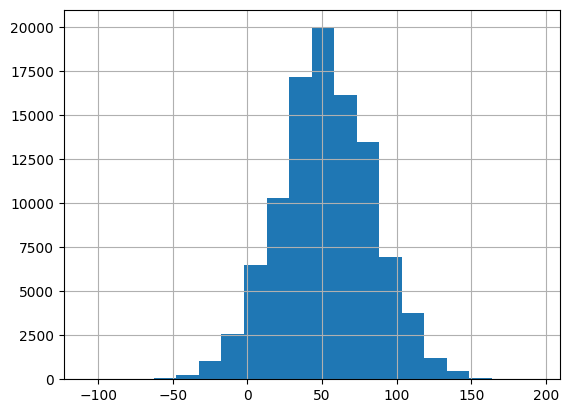

In [18]:
# Plot frecuencies histograms
plt.hist(samplings, bins=20)
plt.grid(True)
plt.show()

In [10]:
# Standard error 
std = np.std(samplings)
std

np.float64(31.25356238191096)

In [11]:
n = len(samplings)
n

10000

In [12]:
# Stadandard error formula
std/np.sqrt(n)

np.float64(0.3125356238191096)

In [ ]:
# Bernoulli distribution: Es una distribucion de probabilidad discreta de una variable aleatoria que toma el valor de "1" con probabilidad "p" y el valor "0" con probabilidad "1 - p". 
# Un ejemplo basico es el lanzamiento de una moneda donde "p" es 0.5 para cara(1) y 0.5 para sello(0). E[X] = 0.5, VAR[X] = 0.25 
# El segundo ejemplo es obtener 5 o 6 en un lanzamiento de dado, donde acertar(1) tiene probabilidad 1/6 + 1/6 = 2/6. Y la probabilidad de fallar(0) es 4/6. E[X] = 1/3, VAR[X] = 2/6 * 4/6 = 2/9
# El valor esperado E[X] es "p" y la varianza VAR[X] es igual a "p*(1-p)"

In [ ]:
# Binomial distribution: Es una distribucion de probabilidad discreta del numero de exitos en una secuencia de "n" experimentos independientes Bernoulli, donde el exito tiene probabilidad "p" y el fracaso 1-p
# Probabilidad de sacar 3 caras en un lanzamiento de 4 monedas, cada lanzamiento de moneda es un evento Bernoulli independiente de los otros lanzamientos.
# Binomial distribution formula:

$ P(X=k) = {n\choose k} p^k*(1-p)^{n-k} $

$ {n\choose k} = n!/(k! * n-k!) $
$ n! = n * (n-1)*(n-2)... * 1 $

In [ ]:
# El valor esperado de la distribucion binomial E[X] = n*p y la varianza es VAR[X] = n*p * (1-p)

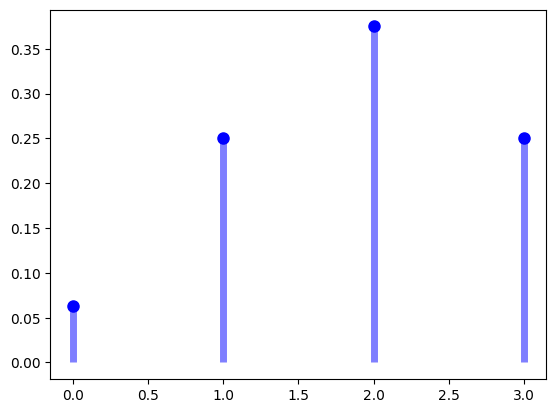

In [18]:
# Exisate un evento "n" que es la probabilidad de sacar 3 caras en un lanzamiento de 4 monedas 
n, p = 4, 0.5
rv = binom(n, p)
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), "bo", ms=8, label="funcion de probabilidad masa")
ax.vlines(x, 0, binom.pmf(x, n, p), colors = "b", lw = 5, alpha = 0.5)
plt.show()

In [ ]:
# Poisson distribution: Es una distribucion de probabilidad discreta que expresa la probabilidad de que un numero dado de eventos ocurra en un intervalo fijo de tiempo a una tasa media constante(lambda)
# La formula es la siguiente:

$$ P(X=k) =\frac{ \lambda^k * e^{-\lambda} } {k!} $$

In [ ]:
# El valor esperado de E[X] es igual a lambda y la varianza VAR[X] es igual a lambda

In [ ]:
# Normal distribution: Es una distribucion de probabilidad continua para una variable aleatoria en el espacio continuo y esta representada por su media "mu" y su desviacion estandar "sigma"
# La formula es la siguiente:

$$ P(X = \mu\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} * e^{\frac{-(x-\mu)^2}{2\sigma^2}} $$

In [ ]:
# El valor esperado E[X] es "mu" y la varianza VAR[X] es "sigma" al cuadrado